In [1]:
#Predicting Coffee Futures by Laura Kahn 
#INFOI590 | Applied Data Science | Fall 2017 | Final Report Documentation

#Hypothesis - Opening, Low and High Coffee Futures Prices can be used to predict daily Closing Price.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
#Read the CSV into a data frame
#Source data from: https://www.investing.com/commodities/us-coffee-c from January 1, 2010 - November 15, 2017

df = pd.read_csv('KC-CoffeeFutures2.csv')
df.head(19)

,Date,Closing,Open,High,Low
0,15-Nov-17,126.80,126.85,127.53,126.28
1,14-Nov-17,127.05,127.55,129.00,124.25
2,13-Nov-17,127.60,127.50,128.15,126.65
3,10-Nov-17,127.55,126.05,128.35,125.50
4,9-Nov-17,126.40,125.55,127.40,125.00
5,8-Nov-17,125.75,125.05,125.90,124.20
6,7-Nov-17,124.70,125.50,125.80,123.10
7,6-Nov-17,125.55,123.95,126.40,122.25
8,3-Nov-17,123.95,127.15,127.40,126.25
9,2-Nov-17,126.40,123.35,127.60,122.55


In [4]:
#Exploratory data analysis
#Let's start by looking at the summary statistics for each variable in the data.
df.describe()

#There are 2805 days of daily trading prices for the coffee futures. All prices are in US$
#Closing Price ranges from 101.5-304.9.
#Open Price ranges from 101.5-305.3.
#High Price ranges from 103.75-306.25.
#Low Price ranges from 100.95-304.

,Closing,Open,High,Low
count,2805.000000,2805.000000,2805.000000,2805.000000
mean,169.241907,169.447355,171.432980,167.379430
std,48.736788,48.758244,49.428461,48.087293
min,101.500000,101.500000,103.750000,100.950000
25%,131.550000,131.800000,133.000000,130.050000
50%,153.700000,154.150000,156.400000,151.850000
75%,196.700000,197.400000,200.650000,193.700000
max,304.900000,305.300000,306.250000,304.000000


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


(array([  50.,  100.,  150.,  200.,  250.,  300.,  350.]),
 <a list of 7 Text yticklabel objects>)

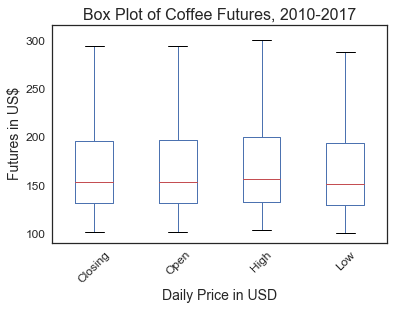

In [4]:
#Next, let's do a box plot to visualize the summary statistics.
df.plot(kind='box')
plt.title('Box Plot of Coffee Futures, 2010-2017',fontsize=16)
plt.xlabel('Daily Price in USD',fontsize=14)
plt.ylabel('Futures in US$',fontsize=14)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


(array([  50.,  100.,  150.,  200.,  250.,  300.,  350.]),
 <a list of 7 Text yticklabel objects>)

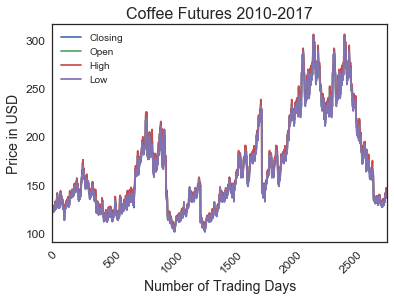

In [5]:
#Let's look at a plot of all columns with labels
df.plot();
plt.xlabel("Number of Trading Days",fontsize=14)
plt.ylabel("Price in USD", fontsize=14)
plt.title("Coffee Futures 2010-2017",fontsize=16)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)

#From the visualization, a general fluctuating trend can be seen. There is very small differences (decimal points)
# from the Open, Low, High and Closing Prices.

(array([  75.,  100.,  125.,  150.,  175.,  200.,  225.,  250.,  275.,
         300.,  325.]), <a list of 11 Text yticklabel objects>)

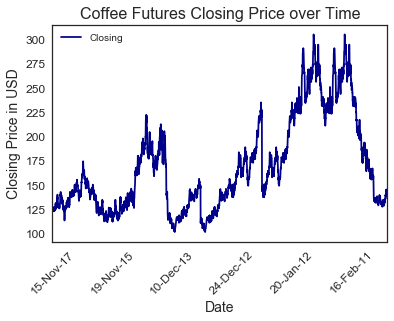

In [6]:
#Let's isolate the ClosingPrice data
df.plot(x='Date', y='Closing', color = 'darkblue')
plt.ylabel("Closing Price in USD", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.title("Coffee Futures Closing Price over Time",fontsize=16)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)

#ClosingPrice follows the same general shape as "Open", "High" and "Low" prices.

(array([ 0.   ,  0.002,  0.004,  0.006,  0.008,  0.01 ,  0.012,  0.014,
         0.016]), <a list of 9 Text yticklabel objects>)

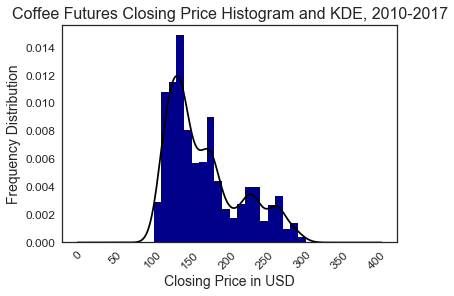

In [8]:
#Let's look at a histogram and Kernel density estimate for each variable, "ClosingPrice", "Open", "High" and "Low"
#To see how the data is distriuted.
df['Closing'].hist(bins=20, normed=True, color='darkblue')
df['Closing'].plot(kind='kde', color='black')
plt.xlabel("Closing Price in USD", fontsize=14)
plt.ylabel("Frequency Distribution", fontsize=14)
plt.title("Coffee Futures Closing Price Histogram and KDE, 2010-2017",fontsize=16)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)

(array([ 0.   ,  0.002,  0.004,  0.006,  0.008,  0.01 ,  0.012,  0.014,
         0.016]), <a list of 9 Text yticklabel objects>)

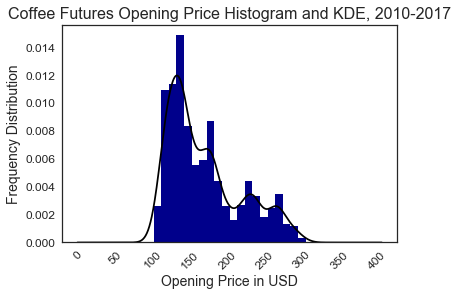

In [9]:
df['Open'].hist(bins=20, normed=True, color='darkblue')
df['Open'].plot(kind='kde', color='black')
plt.xlabel("Opening Price in USD",fontsize=14)
plt.ylabel("Frequency Distribution", fontsize=14)
plt.title("Coffee Futures Opening Price Histogram and KDE, 2010-2017",fontsize=16)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)

(array([ 0.   ,  0.002,  0.004,  0.006,  0.008,  0.01 ,  0.012,  0.014,
         0.016]), <a list of 9 Text yticklabel objects>)

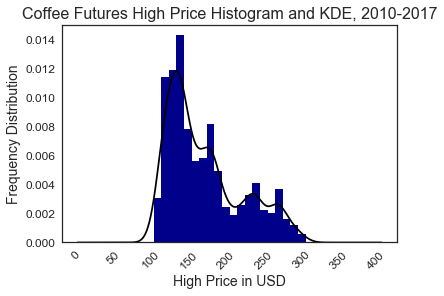

In [11]:
df['High'].hist(bins=20, normed=True, color='darkblue')
df['High'].plot(kind='kde', color='black')
plt.xlabel("High Price in USD",fontsize=14)
plt.ylabel("Frequency Distribution", fontsize=14)
plt.title("Coffee Futures High Price Histogram and KDE, 2010-2017",fontsize=16)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)

(array([ 0.   ,  0.002,  0.004,  0.006,  0.008,  0.01 ,  0.012,  0.014,
         0.016,  0.018]), <a list of 10 Text yticklabel objects>)

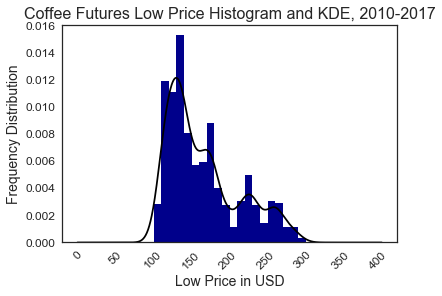

In [12]:
df['Low'].hist(bins=20, normed=True, color='darkblue')
df['Low'].plot(kind='kde', color='black')
plt.xlabel("Low Price in USD", fontsize=14)
plt.ylabel("Frequency Distribution", fontsize=14)
plt.title("Coffee Futures Low Price Histogram and KDE, 2010-2017",fontsize=16)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)

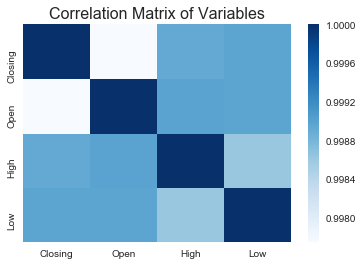

In [16]:
#In addition to using histograms and kernel density estimates, let's use a correlation matrix data visualization 
#to see relationships between the variables in the coffee futures data.

import seaborn as sns
import pandas as pd
import numpy as np
ax = plt.axes()
corr = df.corr()
sns.heatmap(corr, cmap='Blues', xticklabels=corr.columns.values, yticklabels=corr.columns.values)
ax.set_title('Correlation Matrix of Variables',fontsize=16)
sns.plt.show()

#This visualization is not particularly helpful as it appears all the 
#variables are highly positively correlated to each other (0.9992 and above). Let's explore a bit further.

In [17]:
#Now that we've done some exploratory data analysis, let's move onto selecting and creating 
#variables for use in the machine learning models.
#Import machine learning classifiers 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

#Import ML metrics
from sklearn.cross_validation import train_test_split
import sklearn.metrics
from sklearn.metrics import classification_report

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
#Encode the categorical features as numbers
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import preprocessing
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_data, _ = number_encode_features(df)

In [19]:
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model

#Define y_train and y_test variables - desired output is "ClosingPrice" variable
X_train, X_test, y_train, y_test = cross_validation.train_test_split(encoded_data[encoded_data.columns - ["Closing"]], 
    encoded_data["Closing"], train_size=0.80)

#Let's scale the features with mean of 0 and variance of 1 using a Standard Scaler from scikit-learn
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train.astype("float64")), columns=X_train.columns)
X_test = scaler.transform(X_test.astype("float64"))

y_train = pd.DataFrame(scaler.fit_transform(X_train.astype("float64")), columns=X_train.columns)
y_test = scaler.transform(X_test.astype("float64"))

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


In [20]:
#Let's do a Linear Regression model to begin since it's the simplest model and is easy to interpret
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
print(regr.coef_)

[[  1.00000000e+00  -2.16126319e-16   5.32427434e-16  -3.64332506e-16]
 [ -1.42473561e-16   1.00000000e+00  -4.44089210e-16   2.22044605e-16]
 [ -6.27972339e-17   1.85962357e-15   1.00000000e+00   3.33066907e-16]
 [ -6.66286127e-17  -2.22044605e-16  -4.02455846e-16   1.00000000e+00]]


In [21]:
#Now, rather than encoding the variables, we will explicitly define them.

#X is columns 2-4 (Open, High & Low Price)
X = df.values[:,2:4]
#Target variable Y is column 1 (Closing Price)
y = df.values[:,1]

#Split data into test and training data with 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [22]:
#Next, we evaluate the LR model
from sklearn.model_selection import cross_val_score
regr = linear_model.LinearRegression()
regr.fit(X,y)
cross_val_score(regr, X, y,cv=10)

#Cross validation score for linear regression is 0.982.

array([ 0.98227517,  0.98250914,  0.99001714,  0.99510831,  0.98830391,
        0.98274241,  0.98902673,  0.98687774,  0.98046056,  0.99606433])

In [23]:
#Now let's look at the R squared goodness of fit metric for the Linear Regression Model
#R2 is the proportion of variance in the dependent variable that is predictable from the independent variables.
from sklearn import model_selection

regr = linear_model.LinearRegression()
regr.fit(X,y)
scoring = 'r2'

results = model_selection.cross_val_score(regr, X, y, scoring=scoring)
results

#Linear Regression Goodness of Fit = 0.996.

array([ 0.99220141,  0.99583791,  0.99655071])

(array([  75.,  100.,  125.,  150.,  175.,  200.,  225.,  250.,  275.,
         300.,  325.]), <a list of 11 Text yticklabel objects>)

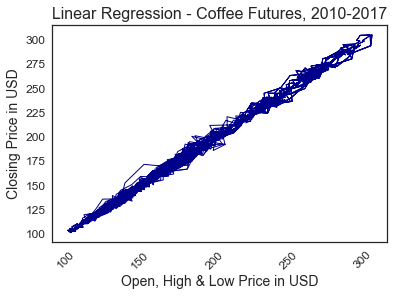

In [24]:
# Plot the Linear Regression results
plt.figure()
plt.plot(X, y, c="darkblue", linewidth=1)
plt.xlabel("Open, High & Low Price in USD",fontsize=14)
plt.ylabel("Closing Price in USD",fontsize=14)
plt.title("Linear Regression - Coffee Futures, 2010-2017",fontsize=16)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)

In [25]:
#Let's predict the Closing Price using the Linear Regression Model and see how close it gets to actual Closing Prices.
X

array([[126.85, 127.53],
       [127.55, 129.0],
       [127.5, 128.15],
       ..., 
       [141.85, 142.7],
       [136.0, 142.45],
       [135.93, 135.93]], dtype=object)

In [26]:
predictedClosing = regr.predict(X)
predictedClosing

#Convert array to dataframe
LR = pd.DataFrame(predictedClosing, columns=['LR Predicted'])
LR.head(31)

# On Day 0 (15-Nov-17), predicted Closing Price is $125.95. The actual Closing Price is $126.80.
# On Day 10 (2-Nov-17), predicted Closing Price is $124.70. The actual Closing Price is $126.40.
# On Day 20 (18-Oct-17), predicted Closing Price is $123.55. The actual Closing Price is $124.30.
# On Day 30 (4-Oct-17), predicted Closing Price is $126.19. The actual Closing Price is $125.15.

,LR Predicted
0,125.946209
1,127.454415
2,126.553729
3,126.883475
4,125.912623
5,124.356366
6,124.213658
7,124.977213
8,125.783661
9,126.302820


In [23]:
#Write LR Closing Price Prediction to CSV file
LR.to_csv('LR.csv')

In [27]:
#Code adapted from: http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html
#Next, let's do a Decision Tree classifier
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

#Define x and y variables.
#X variable will be columns 2-4 in the original df ('Open','High' and 'Low')
#y variable will be target value - column 1 in the df ('ClosingPrice')
X = df.values[:,2:4]
y = df.values[:,1]

#Split data into test and training data with 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [28]:
X.shape,y.shape

((2805, 2), (2805,))

In [29]:
#A regular Decision Tree classifier won't work since the data is continuous.
#So let's try using a Decision Tree Regressor. 

#Import libraries
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

#Initiate model
regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X,y)
#Model cross-validation score
cross_val_score(regressor, X, y,cv=10)

array([ 0.95417882,  0.95663602,  0.98216818,  0.99259414,  0.99539433,
        0.99795423,  0.9935154 ,  0.9999999 ,  0.99379191,  0.9904041 ])

In [30]:
#Now let's look at the R squared goodness of fit metric for the Decision Tree Regressor.
from sklearn import model_selection

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)
scoring = 'r2'

results = model_selection.cross_val_score(regressor, X, y, scoring=scoring)
results

#Decision Tree Regressor Goodness of Fit = 0.799. This is really irrelevant for practical applications since
#the prediction is less than 14% accurate.

array([ 0.9860882 ,  0.98796996,  0.79875432])

(array([  75.,  100.,  125.,  150.,  175.,  200.,  225.,  250.,  275.,
         300.,  325.]), <a list of 11 Text yticklabel objects>)

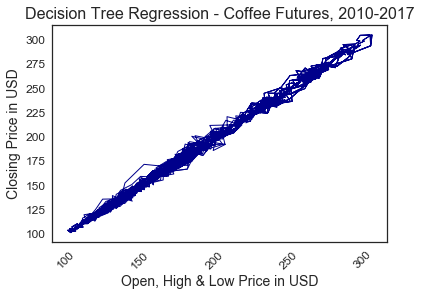

In [31]:
# Plot the Decision Tree Regression results
plt.figure()
plt.plot(X, y, c="darkblue", linewidth=1)
plt.xlabel("Open, High & Low Price in USD",fontsize=14)
plt.ylabel("Closing Price in USD",fontsize=14)
plt.title("Decision Tree Regression - Coffee Futures, 2010-2017",fontsize=16)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)

In [32]:
#For practical applications, let's predict the Closing Price using the Decision Tree Regression Model
y2 = regressor.predict(X)
y2

#Convert array to dataframe
DTRegression = pd.DataFrame(y2, columns=['DT Regr Predicted'])
DTRegression.head(31)

#On Day 0 (15-Nov-17), predicted Closing Price is $126.8. The actual Closing Price is $126.8.
#On Day 10 (2-Nov-17), predicted Closing Price is $122.95. The actual Closing Price is $126.4.
#On Day 20 (18-Oct-17), predicted Closing Price is $124.15. The actual Closing Price is $124.3.
#On Day 30 (4-Oct-17), predicted Closing Price is $125.45. The actual Closing Price is $125.45.


,DT Regr Predicted
0,126.800000
1,127.050000
2,127.600000
3,127.550000
4,126.400000
5,125.750000
6,124.700000
7,125.550000
8,123.950000
9,126.400000


In [33]:
#Write Decision Tree Regression DF to CSV
DTRegression.to_csv('DTR.csv')

(array([  75.,  100.,  125.,  150.,  175.,  200.,  225.,  250.,  275.,
         300.,  325.]), <a list of 11 Text yticklabel objects>)

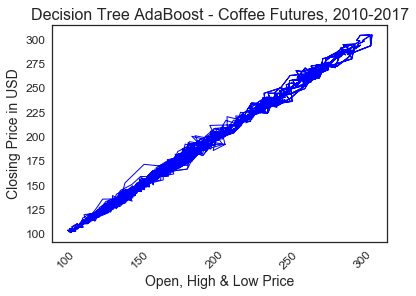

In [34]:
# Next, let's try Decision Tree Regression with AdaBoost and plot the result 
from sklearn.ensemble import AdaBoostRegressor
#X variable will be columns 2-4 in the df ('Open','High' and 'Low')
#y variable will be target value - column 1 in the df ('ClosingPrice')
X = df.values[:,2:4]
y = df.values[:,1]

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)

regr_2.fit(X, y)

# Plot the results
plt.figure()
plt.plot(X, y, c="blue", label="n_estimators=300", linewidth=1)
plt.xlabel("Open, High & Low Price",fontsize=14)
plt.ylabel("Closing Price in USD",fontsize=14)
plt.title("Decision Tree AdaBoost - Coffee Futures, 2010-2017",fontsize=16)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)

In [35]:
#AdaBoost Goodness of Fit, R squared.
scoring = 'r2'

results = model_selection.cross_val_score(regr_2, X, y, scoring=scoring)
results

#AdaBoost R squared = 0.749 so it's a worse fit than the Linear Regression & Decision Tree Regressor models. 
#Can we do better?

array([ 0.9887099 ,  0.98257996,  0.76777158])

In [36]:
cross_val_score(regr_2, X, y,cv=10)

array([ 0.96670843,  0.97018896,  0.98733958,  0.99226132,  0.98253079,
        0.96414862,  0.9792284 ,  0.98757493,  0.97855354,  0.9910516 ])

In [37]:
#Predict Closing Price, y2, using Decision Tree AdaBoost Model
y2 = regr_2.predict(X)
y2

#Convert array to dataframe
AdaBoost = pd.DataFrame(y2, columns=['AdaBoost Predicted'])
AdaBoost.head(31)

#On Day 0 (15-Nov-17), predicted Closing Price is $125.25. The actual Closing Price is $126.80.
#On Day 10 (2-Nov-17), predicted Closing Price is $122.53. The actual Closing Price is $126.40.
#On Day 20 (18-Oct-17), predicted Closing Price is $122.53. The actual Closing Price is $124.30.
#On Day 30 (4-Oct-17), predicted Closing Price is $125.25. The actual Closing Price is $125.15.

,AdaBoost Predicted
0,126.718889
1,127.254545
2,126.718889
3,126.209661
4,125.969611
5,124.382836
6,124.514756
7,124.310816
8,126.718889
9,124.716800


In [35]:
#Write the AdaBoost DF to a CSV file
AdaBoost.to_csv('AdaBoost.csv')

In [38]:
#Since I'm trying to predict a quantity for ClosingPrice, I will try Ridge Regression model next.
#Import library
from sklearn.linear_model import Ridge
#Define X and y variables
X = df.values[:,2:4]
y = df.values[:,1]

clf = Ridge(alpha=1.0)
#Fit the model
clf.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
#Ridge Regression Goodness of Fit, R squared
scoring = 'r2'

results = model_selection.cross_val_score(clf, X, y, scoring=scoring)
results

#Ridge Regression Goodness of Fit = 0.996 which is the same performance as the linear regression model.

array([ 0.99220158,  0.99583787,  0.99655072])

(array([  75.,  100.,  125.,  150.,  175.,  200.,  225.,  250.,  275.,
         300.,  325.]), <a list of 11 Text yticklabel objects>)

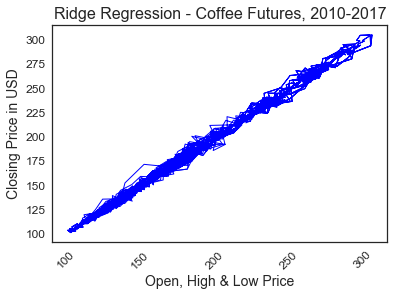

In [40]:
# Plot the Ridge Regression results
plt.figure()
plt.plot(X, y, c="blue", linewidth=1)
plt.xlabel("Open, High & Low Price",fontsize=14)
plt.ylabel("Closing Price in USD",fontsize=14)
plt.title("Ridge Regression - Coffee Futures, 2010-2017",fontsize=16)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)

In [41]:
#Predict Closing Price, y2, using Ridge Regression Model
y2 = clf.predict(X)
y2

#Convert array to dataframe
Ridge = pd.DataFrame(y2, columns=['Ridge Predicted'])
Ridge.head(31)

#On Day 0 (15-Nov-17), predicted Closing Price is $125.94. The actual Closing Price is $126.80.
#On Day 10 (2-Nov-17), predicted Closing Price is $124.70. The actual Closing Price is $126.40.
#On Day 20 (18-Oct-17), predicted Closing Price is $123.56. The actual Closing Price is $124.30.
#On Day 30 (4-Oct-17), predicted Closing Price is $126.19. The actual Closing Price is $125.15.

,Ridge Predicted
0,125.946272
1,127.454415
2,126.553795
3,126.883403
4,125.912587
5,124.356412
6,124.213751
7,124.977126
8,125.783760
9,126.302583


In [40]:
#Save Ridge Regression DF to CSV
Ridge.to_csv('Ridge.csv')

In [42]:
#Let's combine all the Predicted Values from the Linear Regression, Decision Tree Regression, AdaBoost 
#and Ridge Regression into one data frame along with the Actual Values for the Closing Price.

combined = [df, LR, DTRegression, AdaBoost, Ridge]
result = pd.concat(combined, axis=1)
result.head(11)

,Date,Closing,Open,High,Low,LR Predicted,DT Regr Predicted,AdaBoost Predicted,Ridge Predicted
0,15-Nov-17,126.80,126.85,127.53,126.28,125.946209,126.80,126.718889,125.946272
1,14-Nov-17,127.05,127.55,129.00,124.25,127.454415,127.05,127.254545,127.454415
2,13-Nov-17,127.60,127.50,128.15,126.65,126.553729,127.60,126.718889,126.553795
3,10-Nov-17,127.55,126.05,128.35,125.50,126.883475,127.55,126.209661,126.883403
4,9-Nov-17,126.40,125.55,127.40,125.00,125.912623,126.40,125.969611,125.912587
5,8-Nov-17,125.75,125.05,125.90,124.20,124.356366,125.75,124.382836,124.356412
6,7-Nov-17,124.70,125.50,125.80,123.10,124.213658,124.70,124.514756,124.213751
7,6-Nov-17,125.55,123.95,126.40,122.25,124.977213,125.55,124.310816,124.977126
8,3-Nov-17,123.95,127.15,127.40,126.25,125.783661,123.95,126.718889,125.783760
9,2-Nov-17,126.40,123.35,127.60,122.55,126.302820,126.40,124.716800,126.302583


In [43]:
#Now that we've looked at all the models' predicted values, let's calculate percent prediction errors.

#% Prediction error = [(measured value - predicted value) / (measured value )] * 100
#'Closing' is the measured value in the 'result' dataframe above

LR_acc = (result['Closing'] - result['LR Predicted'] ) / result['Closing']
DTR_acc = (result['Closing'] - result['DT Regr Predicted'] ) / result['Closing']
ADA_acc = (result['Closing'] - result['AdaBoost Predicted'])/ result['Closing']
Ridge_acc = (result['Closing'] - result['Ridge Predicted'] ) / result['Closing']

print("\n\nLinear Regression Mean Percent Prediction Error:")
LR = LR_acc.mean()
print(LR)

print("\n\nDecision Tree Regression Mean Percent Prediction Error:")
DTR = DTR_acc.mean()
print(DTR)

print("\n\nAdaBoost Mean Percent Prediction Error:")
ADA = ADA_acc.mean()
print(ADA)


print("\n\nRidge Regression Mean Percent Prediction Error:")
Ridge = Ridge_acc.mean()
print(Ridge)



Linear Regression Mean Percent Prediction Error:
-9.736545893801515e-05


Decision Tree Regression Mean Percent Prediction Error:
-5.421444828311267e-06


AdaBoost Mean Percent Prediction Error:
0.004451496050555237


Ridge Regression Mean Percent Prediction Error:
-9.738373776640024e-05


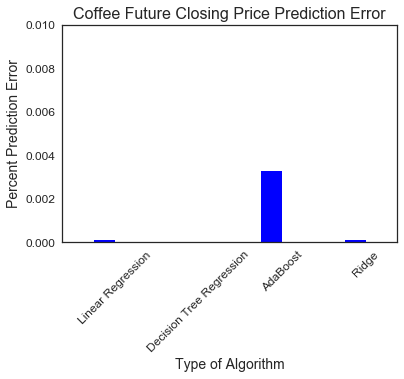

In [45]:
#Plot Classifier Percent Prediction Errors. All classifiers have less than 1% error which makes them pretty super
#classifiers.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

labels = ['Linear Regression', 'Decision Tree Regression', 'AdaBoost', 
 'Ridge']
#Rotate Labels to make them readable
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
#add data
#Note the negative value (direction of error is not important so these values have been changed to positive.)
data = [0.00009736, 0.00000542, 0.00328, 0.00009738]

xlocations = np.array(range(len(data)))+0.5
width = 0.25
bar(xlocations, data, width=width, color='blue')
yticks(fontsize=12)
xticks(xlocations+ width/2, labels, fontsize=12)
xlim(0, xlocations[-1]+width*2)

#Set limit to y axis
plt.ylim(ymax = 0.01, ymin=0)
#Add title to plot
title('Coffee Future Closing Price Prediction Error', fontsize=16)
plt.xlabel("Type of Algorithm",fontsize=14)
plt.ylabel("Percent Prediction Error",fontsize=14)
gca().get_xaxis().tick_bottom()
gca().get_yaxis().tick_left()
show()

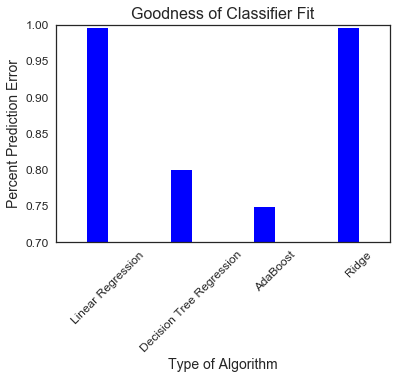

In [48]:
#Plot Classifier Goodness of Fit Results - Linear Regression, Decision Tree, Adaboost and Ridge Regression.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

labels = ['Linear Regression', 'Decision Tree Regression', 'AdaBoost', 
 'Ridge']
#Rotate Labels to make them readable
plt.xticks(rotation=45)
#add data
data = [0.996, 0.799,0.749, 0.996]

xlocations = np.array(range(len(data)))+0.5
width = 0.25
bar(xlocations, data, width=width, color='blue')
yticks(fontsize=12)
xticks(xlocations+ width/2, labels, fontsize=12)
xlim(0, xlocations[-1]+width*2)

#Set limit to y axis
plt.ylim(ymax = 1.0, ymin=0.7)
#Add title to plot
plt.title('Goodness of Classifier Fit', fontsize=16)
plt.xlabel("Type of Algorithm",fontsize=14)
plt.ylabel("Percent Prediction Error",fontsize=14)
gca().get_xaxis().tick_bottom()
gca().get_yaxis().tick_left()
show()

# Linear Regression & Ridge Regression have the highest R2 (goodness of fit). AdaBoost has the lowest R2 so it is 
# the worse fit model. 